In [56]:
%matplotlib notebook

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from glob import glob

In [107]:
def import_trasient_from_file(url_of_folder):
    """
    input: get a url where the function can find the files to import
    The function tranform the import files to on pandas dataframe
    return: a dataframe where we can detect a trasient flag
    """
    append_data = []
    for file_name in glob(url_of_folder + '*.json'):
        data = pd.read_json(file_name)
        append_data.append(data)
        print(file_name)
    all_data = pd.concat(append_data, axis=1).transpose()
    phase_with_trasients_only = all_data[all_data["transient_flag"] == "true"]
    return phase_with_trasients_only

In [108]:
data = import_trasient_from_file("Test_Data/")

Test_Data/transient_01-04-2017_08_01_41_528330.json
Test_Data/transient_01-04-2017_08_14_53_519536.json
Test_Data/transient_01-04-2017_20_57_48_787602.json
Test_Data/transient_02-03-2017_14_42_56_460212.json
Test_Data/transient_02-03-2017_14_45_31_785153.json
Test_Data/transient_02-03-2017_14_45_31_805151.json
Test_Data/transient_02-03-2017_16_30_37_221812.json
Test_Data/transient_02-03-2017_17_00_21_708465.json
Test_Data/transient_02-03-2017_19_01_44_530383.json
Test_Data/transient_02-03-2017_20_09_52_902831.json


## Notiz:

Aufpassen, das Trasienten auch in beiden Phasen gleichzeitig auftretten können. Nochmal gucken on Code überarbeitet werden muss.

In [109]:
data

,begin_index,begin_timestamp_float,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_flag,transient_rise_gradient
phase_2,701,1491026501.529732,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",true,245806.99751296898
phase_2,806,1491027293.5211477,01-04-2017_08:14:53_521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",true,195108.60796327944
phase_2,5717,1491073068.7990358,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",true,242317.78658353366
phase_1,2750,1488462176.4657116,02-03-2017_14:42:56_465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",true,-2846197.144528243
phase_3,9697,1488462331.804547,02-03-2017_14:45:31_804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",true,-1692314.9426778157
phase_3,435,1488462331.8060212,02-03-2017_14:45:31_806021,"[0.10735161280000001, 0.093923882, -0.04026190...",3,"[2.9296875, 2.8991699219, 2.8533935547000002, ...","[-298.5016479492, -298.3405761719, -298.125854...","[20.426, 8.952, 1.933]","[449, 2961, 6998]",true,-711292.8090230712
phase_1,8744,1488468637.2393005,02-03-2017_16:30:37_239300,"[-0.5327860288, -0.5853679045, -0.3247146155, ...",1,"[-4.2572021484, -4.39453125, -4.39453125, -4.4...","[0.3640657961, 0.2080375999, -0.0260047, -0.24...","[40.473, 17.702, 7.373]","[8753, 8792, 8836]",true,2233549.894180057
phase_1,3055,1488470421.7145753,02-03-2017_17:00:21_714575,"[0.2854228914, 0.1826147139, 0.0645840988, -0....",1,"[4.3182373047, 4.3182373047, 4.302978515599999...","[-0.6371151209, -0.2990540564, 0.0780140981, 0...","[55.842, 19.208, 6.912]","[3065, 3144, 3658]",true,2792014.8849487305
phase_3,3057,1488470421.7145793,02-03-2017_17:00:21_714579,"[0.2060560286, 0.1929426789, 0.2864884138, 0.2...",3,"[7.2937011719000004, 7.2784423828, 7.186889648...","[292.7978820801, 292.7442016602, 292.516021728...","[21.792, 9.186, 5.343]","[3064, 3092, 3149]",true,1538662.6379830497
phase_2,5692,1488477704.541767,02-03-2017_19:01:44_541767,"[-0.0903187394, -0.1313503087, -0.1033982262, ...",2,"[-1.0833740234, -1.0528564453, -1.0833740234, ...","[-293.008026123, -293.1896972656, -293.1637268...","[28.069, 4.650, 3.875]","[5744, 5825, 5916]",true,267649.5772141676


In [5]:
trasient_phase1 = data.loc["raw_signal_current"]["phase_1"]
trasient_phase2 = data.loc["filtered_signal"]["phase_2"]
trasient_phase3 = data.loc["raw_signal_current"]["phase_3"]

<IPython.core.display.Javascript object>


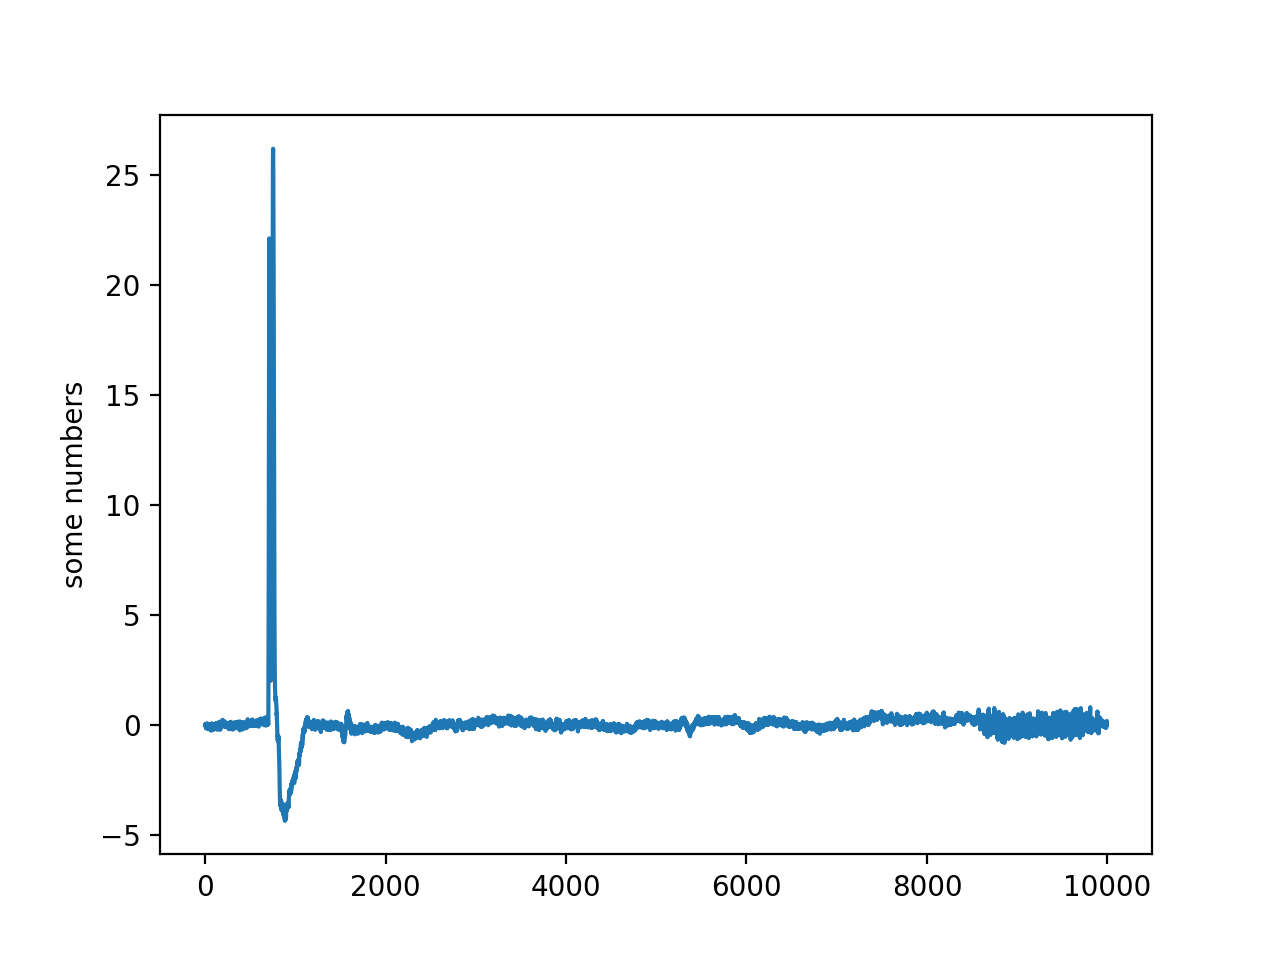

In [8]:
plt.plot(trasient_phase2)

plt.ylabel('some numbers')
plt.show()

In [7]:
plt.plot([1,2,3],[5,7,4])
plt.show()